# Logging String Data

In whylogs logging string and textual data  is simple. In this notebook we show the data that we log.

In [469]:
import warnings
warnings.filterwarnings('ignore')
!pip install Faker
%load_ext autoreload
%autoreload 2


You should consider upgrading via the '/Users/leandro/Library/Caches/pypoetry/virtualenvs/whylogs-vWIOXmxX-py3.8/bin/python -m pip install --upgrade pip' command.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [352]:
from faker import Faker
from collections import OrderedDict
import pandas as pd
import numpy as np

# Let's create Fake String Data

In [416]:
locales=["en-US","fr-FR","pt-BR","ru-RU"]

fake= Faker(locales)

def random_zipcode(states=None,size=1,prob=None,locale="en-US"):
    fake= Faker(locales)
    if prob:
        assert len(prob)==len(prob)
        res=np.random.choice(states,size,p=prob)
    res=np.random.choice(states,size)
    if locale == "en-US":
        return [ fake[locale].postalcode_in_state(state) for state in res]
    else:
        return [ fake[locale].postcode() for _ in range(size) ]
    
def random_zipcode_plus4(size):
    
    return [ fake['en-US'].postalcode_plus4() for _ in range(size)]

def random_names(name_type, size):
    """
    Generate n-length ndarray of person names.
    name_type: a string, either first_names or last_names
    """
    names = getattr(Provider, name_type)
    return np.random.choice(names, size=size)


In [392]:
def random_genders(size, p=None):
    """Generate n-length ndarray of genders."""
    if not p:
        # default probabilities
        p = (0.49, 0.49, 0.01, 0.01)
    gender = ("M", "F", "O", "")
    return np.random.choice(gender, size=size, p=p)


def random_dates(start, end, size):
    """
    Generate random dates within range between start and end.    
    Adapted from: https://stackoverflow.com/a/50668285
    """
    # Unix timestamp is in nanoseconds by default, so divide it by
    # 24*60*60*10**9 to convert to days.
    divide_by = 24 * 60 * 60 * 10**9
    start_u = start.value // divide_by
    end_u = end.value // divide_by
    return pd.to_datetime(np.random.randint(start_u, end_u, size), unit="D")

def array_creation(keycount,bins, char_list):

    matrix=[]
    for char in char_list:
        histo= keycount.get(char,None)
        if histo is not None:
            matrix.append(histo)
        else:
            matrix.append(list(np.zeros_like(bins)))
            
   
    return np.array(char_list)[np.argsort(char_list)], np.array(matrix)[np.argsort(char_list)]

# Each cell as one daily collection

In [314]:
import datetime
list_zips = random_zipcode(["WA","OR"],1000)
from whylogs import get_or_create_session
session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 1)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_1= logger.profile

In [315]:
import datetime
list_zips = random_zipcode(["WA","AK"],200)
from whylogs import get_or_create_session
session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 2)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_2= logger.profile

In [316]:
import datetime
list_zips = random_zipcode(["NY","FL"],1000)
from whylogs import get_or_create_session
session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 3)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_3= logger.profile


In [359]:
import datetime
list_zips = random_zipcode_plus4(1000) + random_zipcode(["FL","TX"],200) 
from whylogs import get_or_create_session
session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 4)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_4= logger.profile

In [360]:
import datetime
list_zips = random_zipcode_plus4(1000) + random_zipcode(["WA","AK"],2000)
from whylogs import get_or_create_session
session= get_or_create_session()
with session.logger(dataset_name='string_dataset',dataset_timestamp=datetime.datetime(2021, 6, 5)) as logger:
    
    for zipc in list_zips:
        logger.log({"zipcode": zipc})
    profile_5= logger.profile

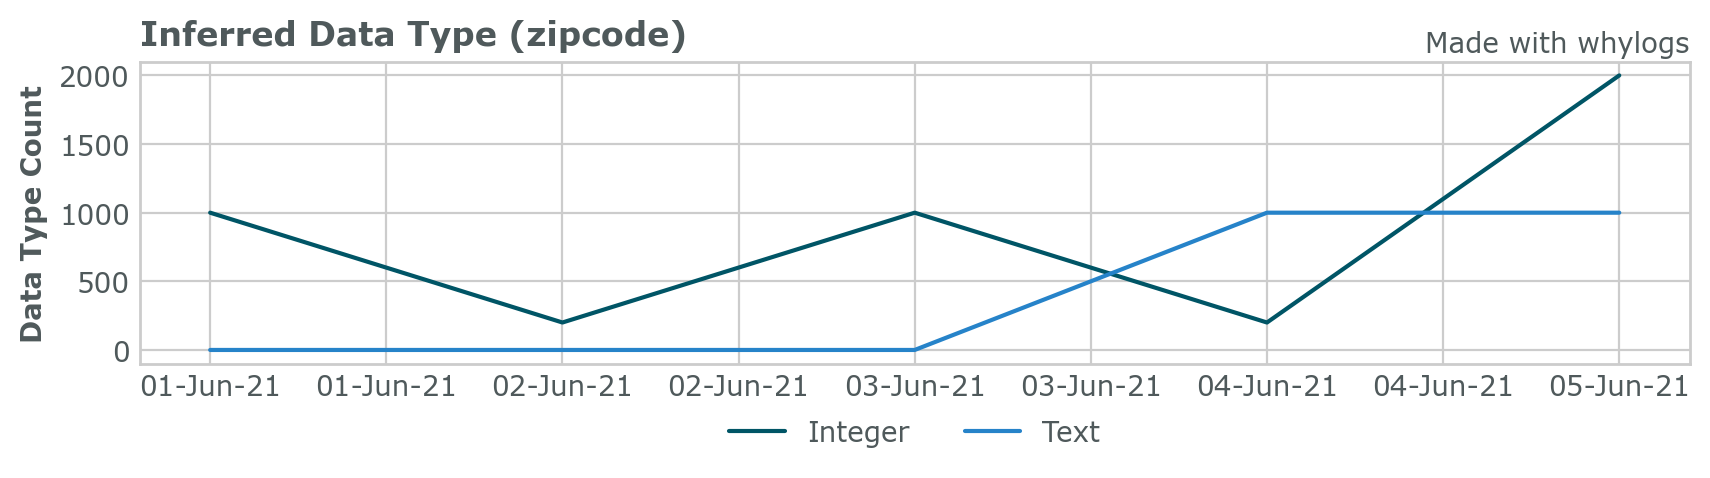

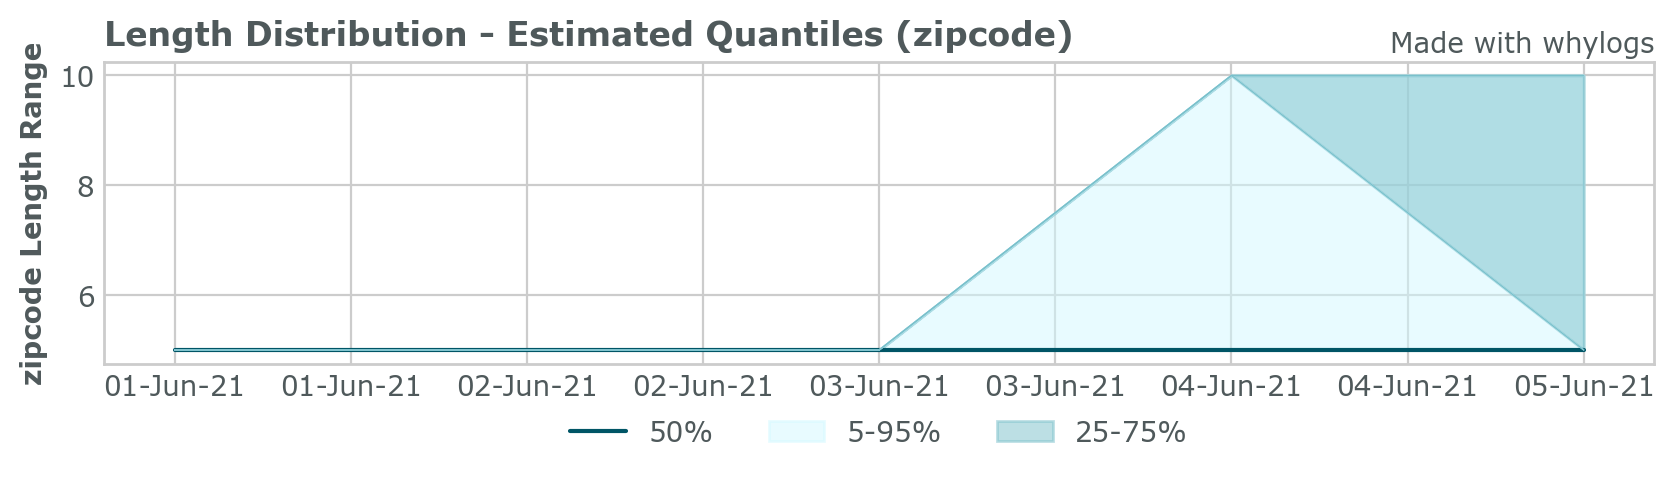

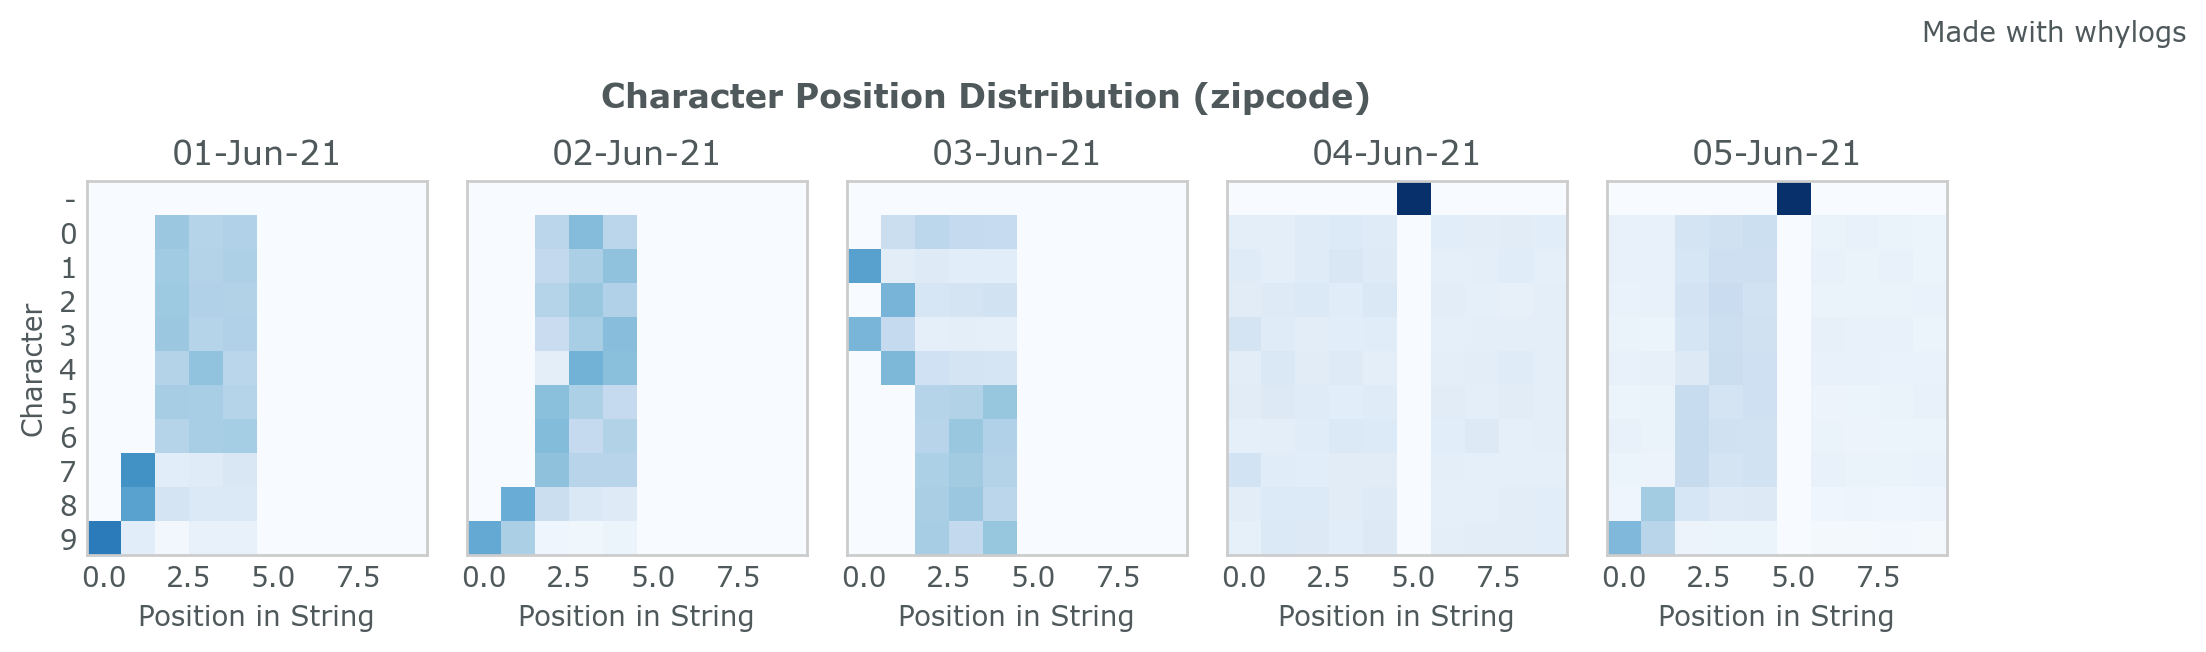

In [367]:
from whylogs.viz import ProfileVisualizer

profiles= [profile_1,profile_2,profile_3,profile_4,profile_5]
viz = ProfileVisualizer()
viz.set_profiles(profiles)
viz.plot_data_types("zipcode", ts_format="%d-%b-%y")
plot_string(profiles,"zipcode")
plt.show()

plot_char_pos_map(profiles,"zipcode")

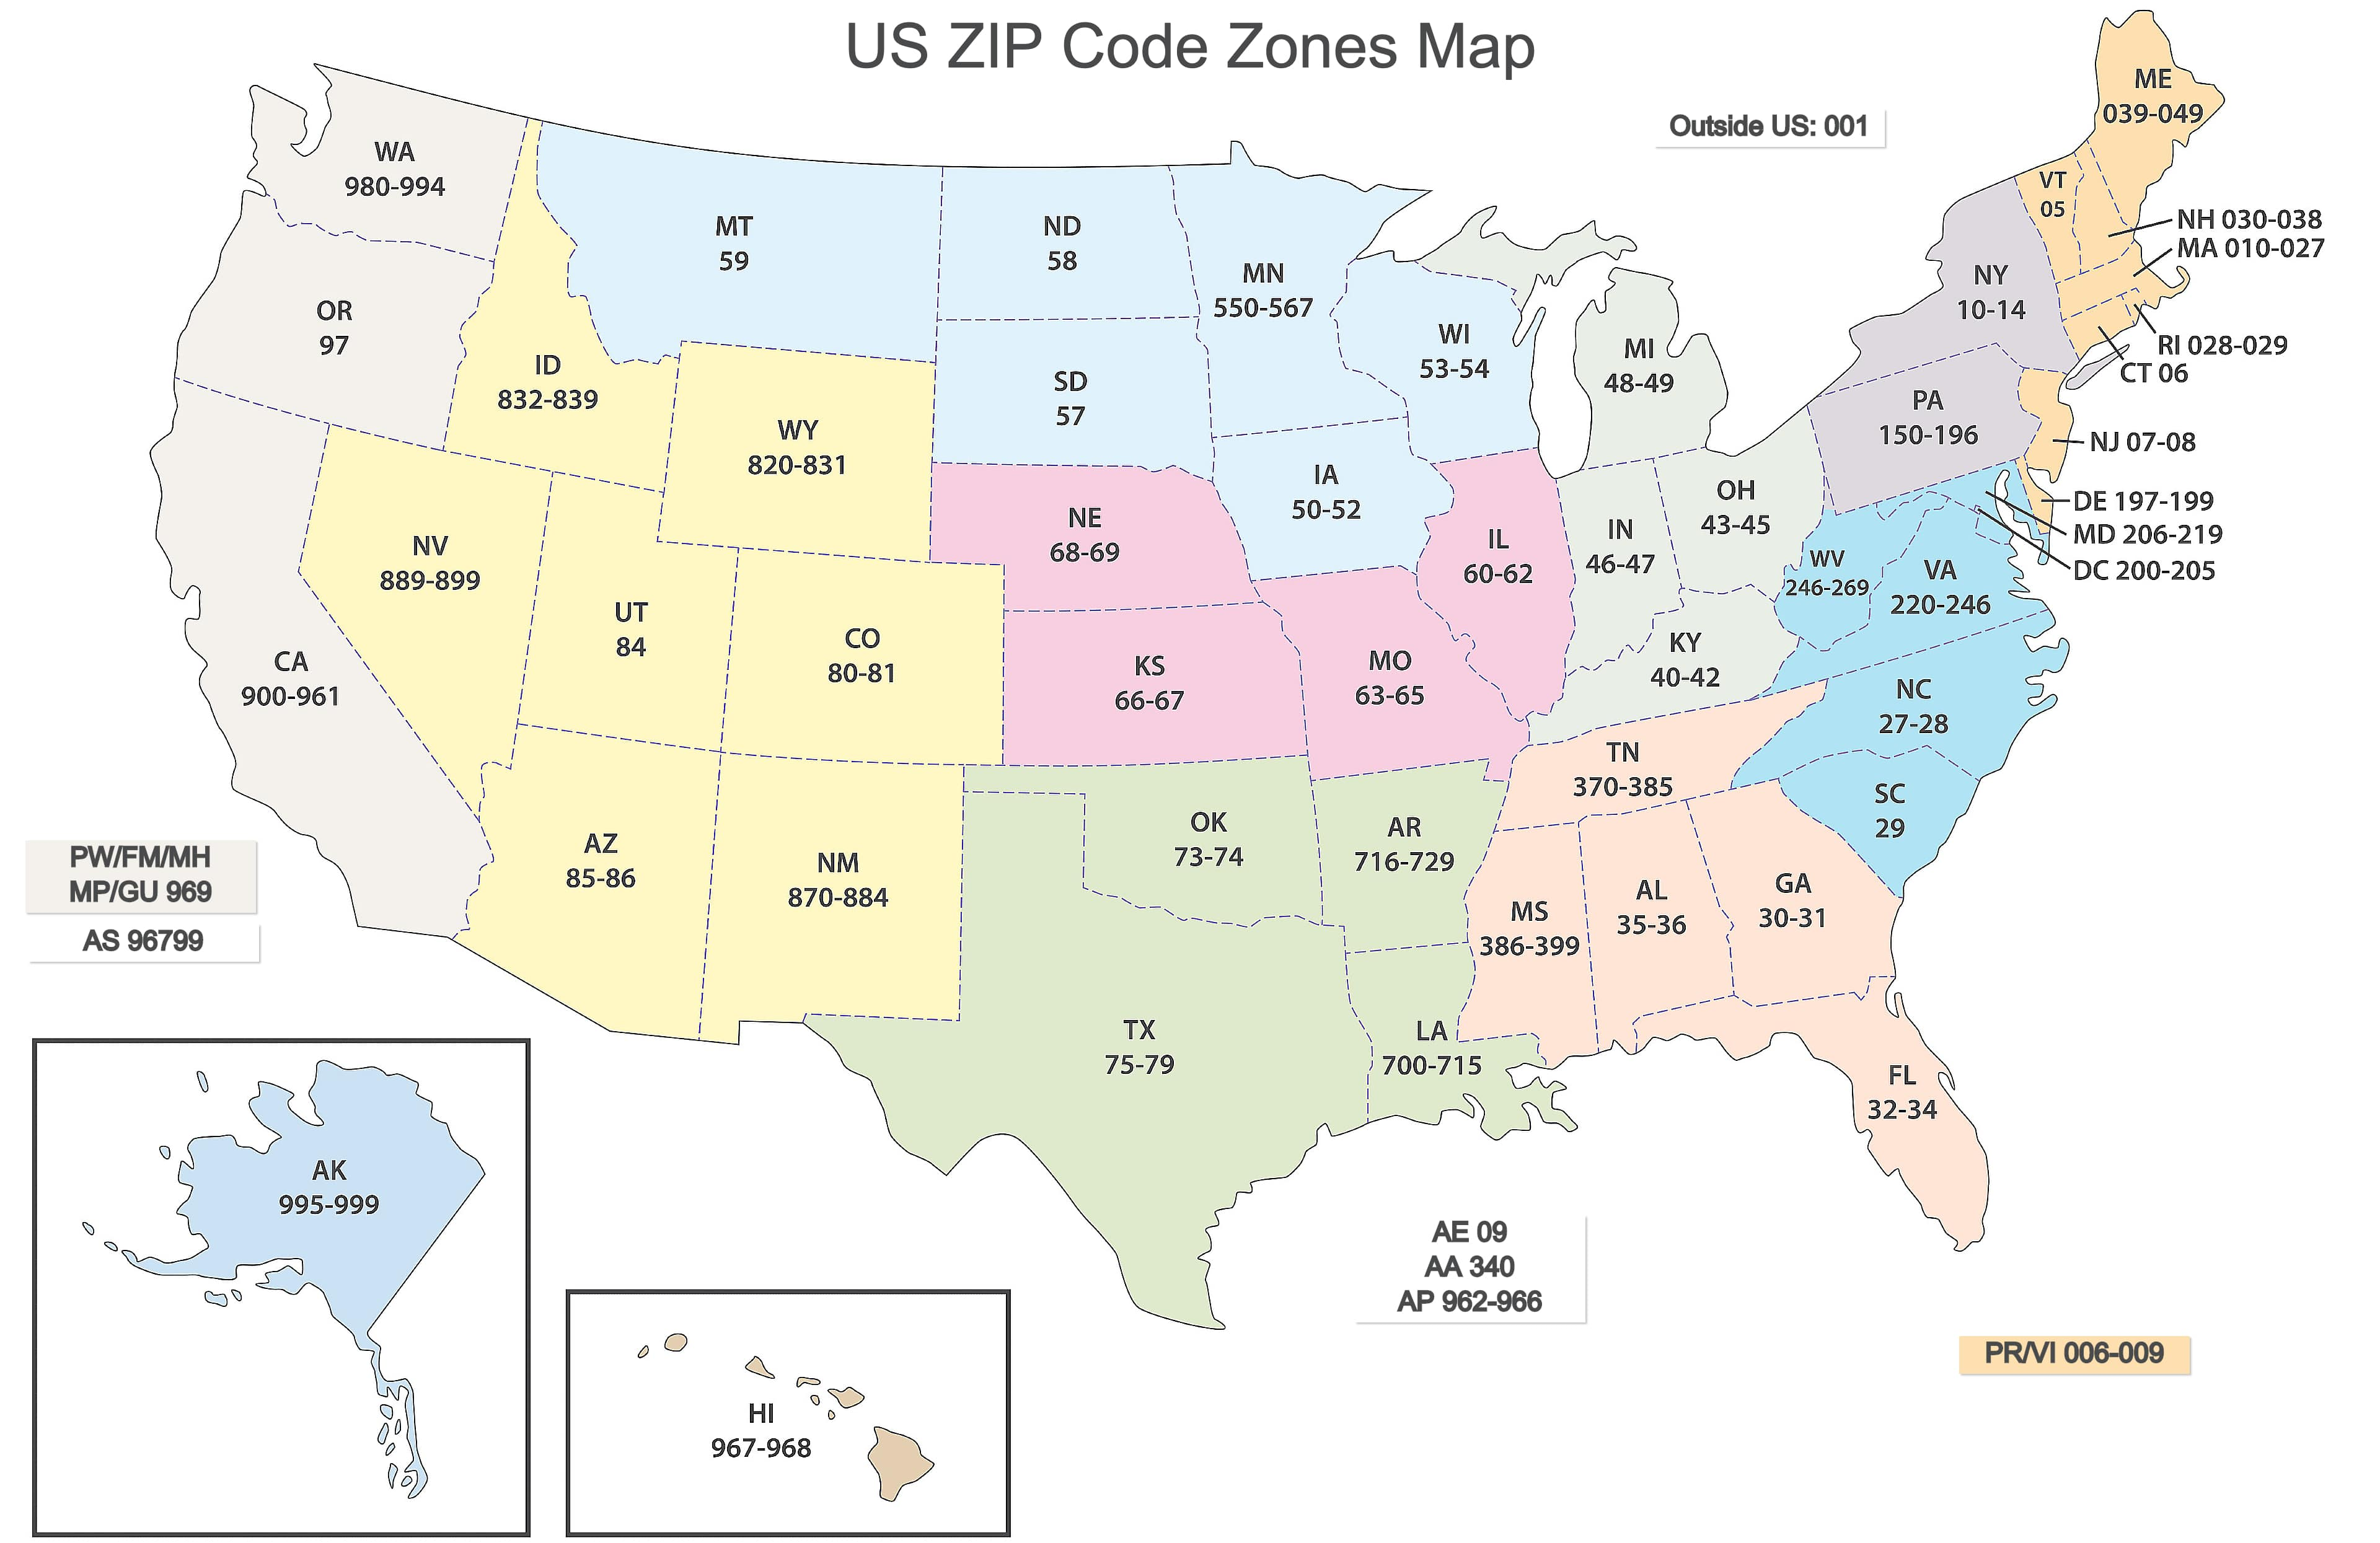

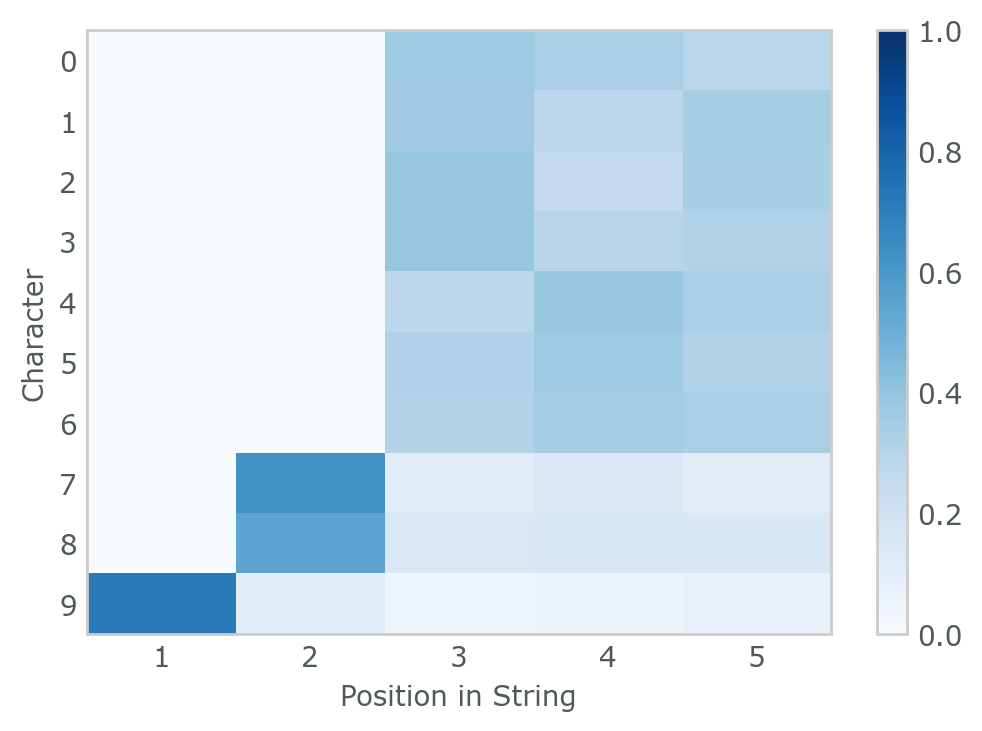

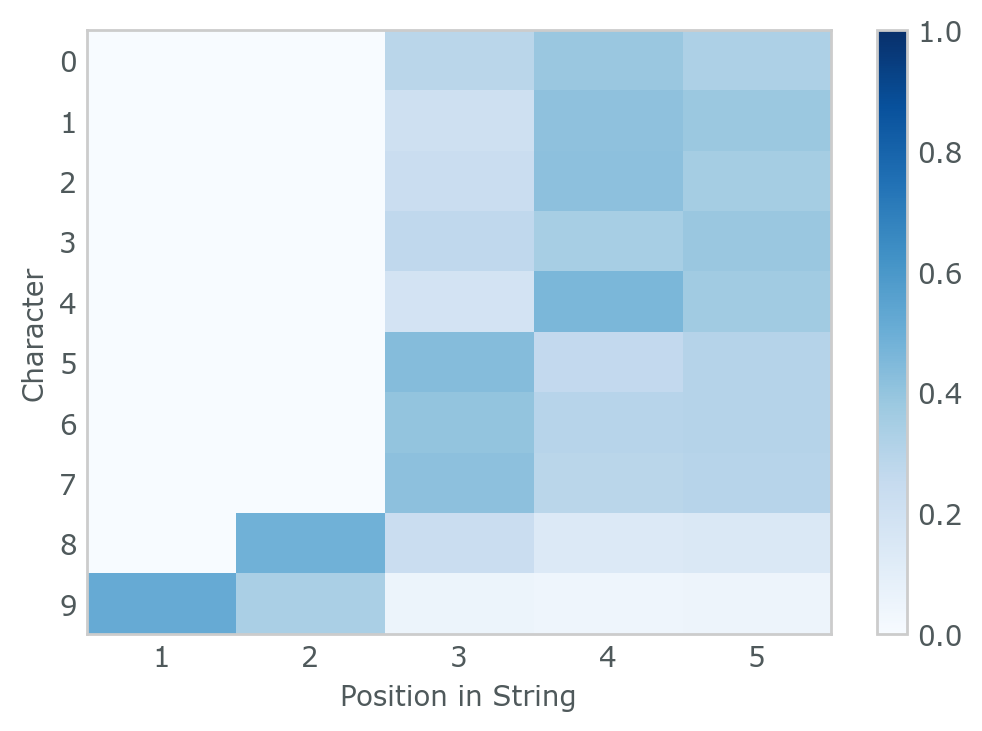

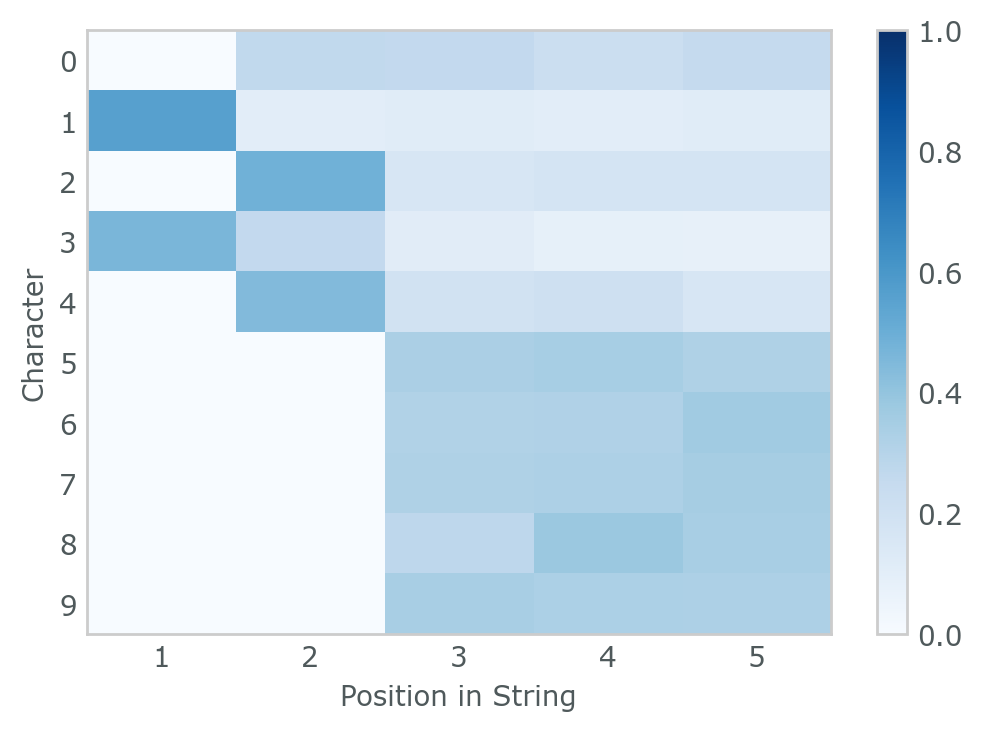

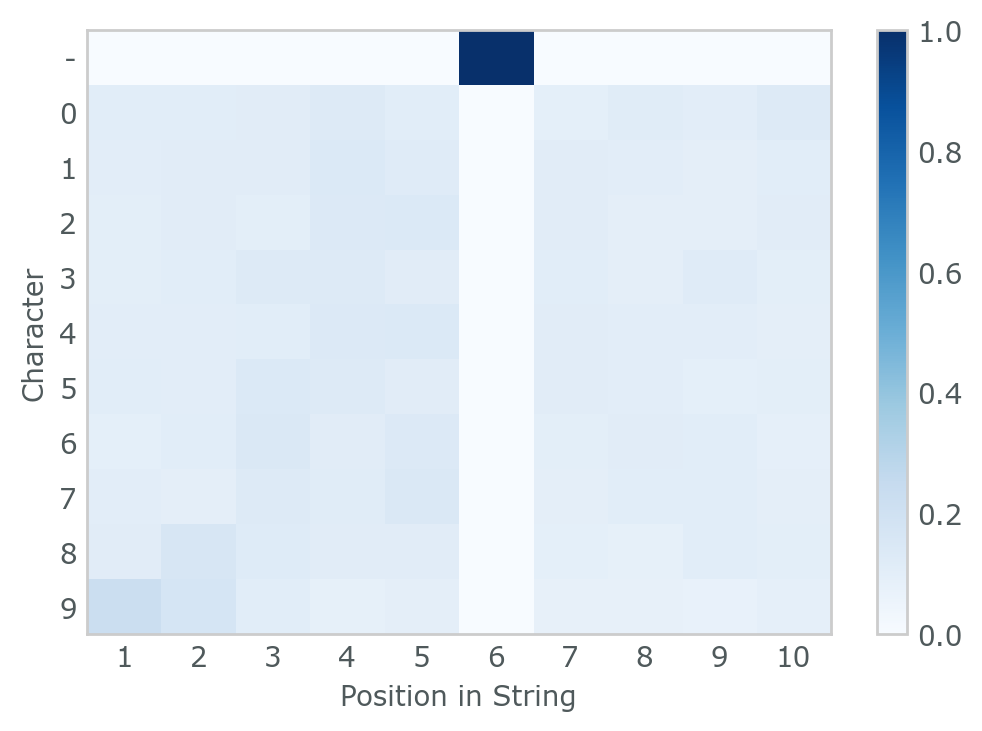

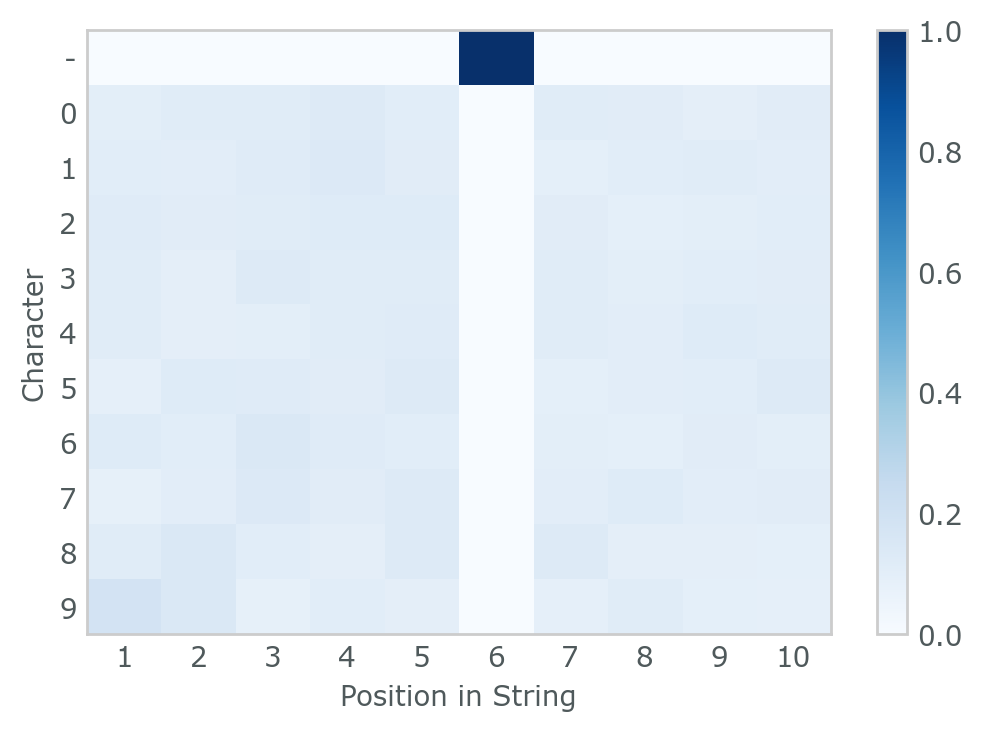

In [133]:
for idx in range(5):
    plot_char_pos_map(profiles[idx],"zipcode") 


In [410]:
def random_sentence(local):
    return fake[local].text(20)
random_sentence("en-US")

'Matter final she.'

In [436]:
import datetime

from whylogs import get_or_create_session
session= get_or_create_session()
with session.logger(dataset_name='string_dataset_text',dataset_timestamp=datetime.datetime(2021, 6, 10)) as logger:
    
    for _ in range(10000):
        logger.log({"text": random_sentence("fr-FR")})
    profile_text_1= logger.profile

In [437]:
import datetime

from whylogs import get_or_create_session
session= get_or_create_session()
with session.logger(dataset_name='string_dataset_text',dataset_timestamp=datetime.datetime(2021, 6, 11)) as logger:
    
    for _ in range(10000):
        logger.log({"text": random_sentence("pt-BR")})
    profile_text_2= logger.profile

In [438]:
import datetime

from whylogs import get_or_create_session
session= get_or_create_session()
with session.logger(dataset_name='string_dataset_text',dataset_timestamp=datetime.datetime(2021, 6, 12)) as logger:
    
    for _ in range(10000):
        logger.log({"text": random_sentence("en-US")})
    profile_text_3= logger.profile

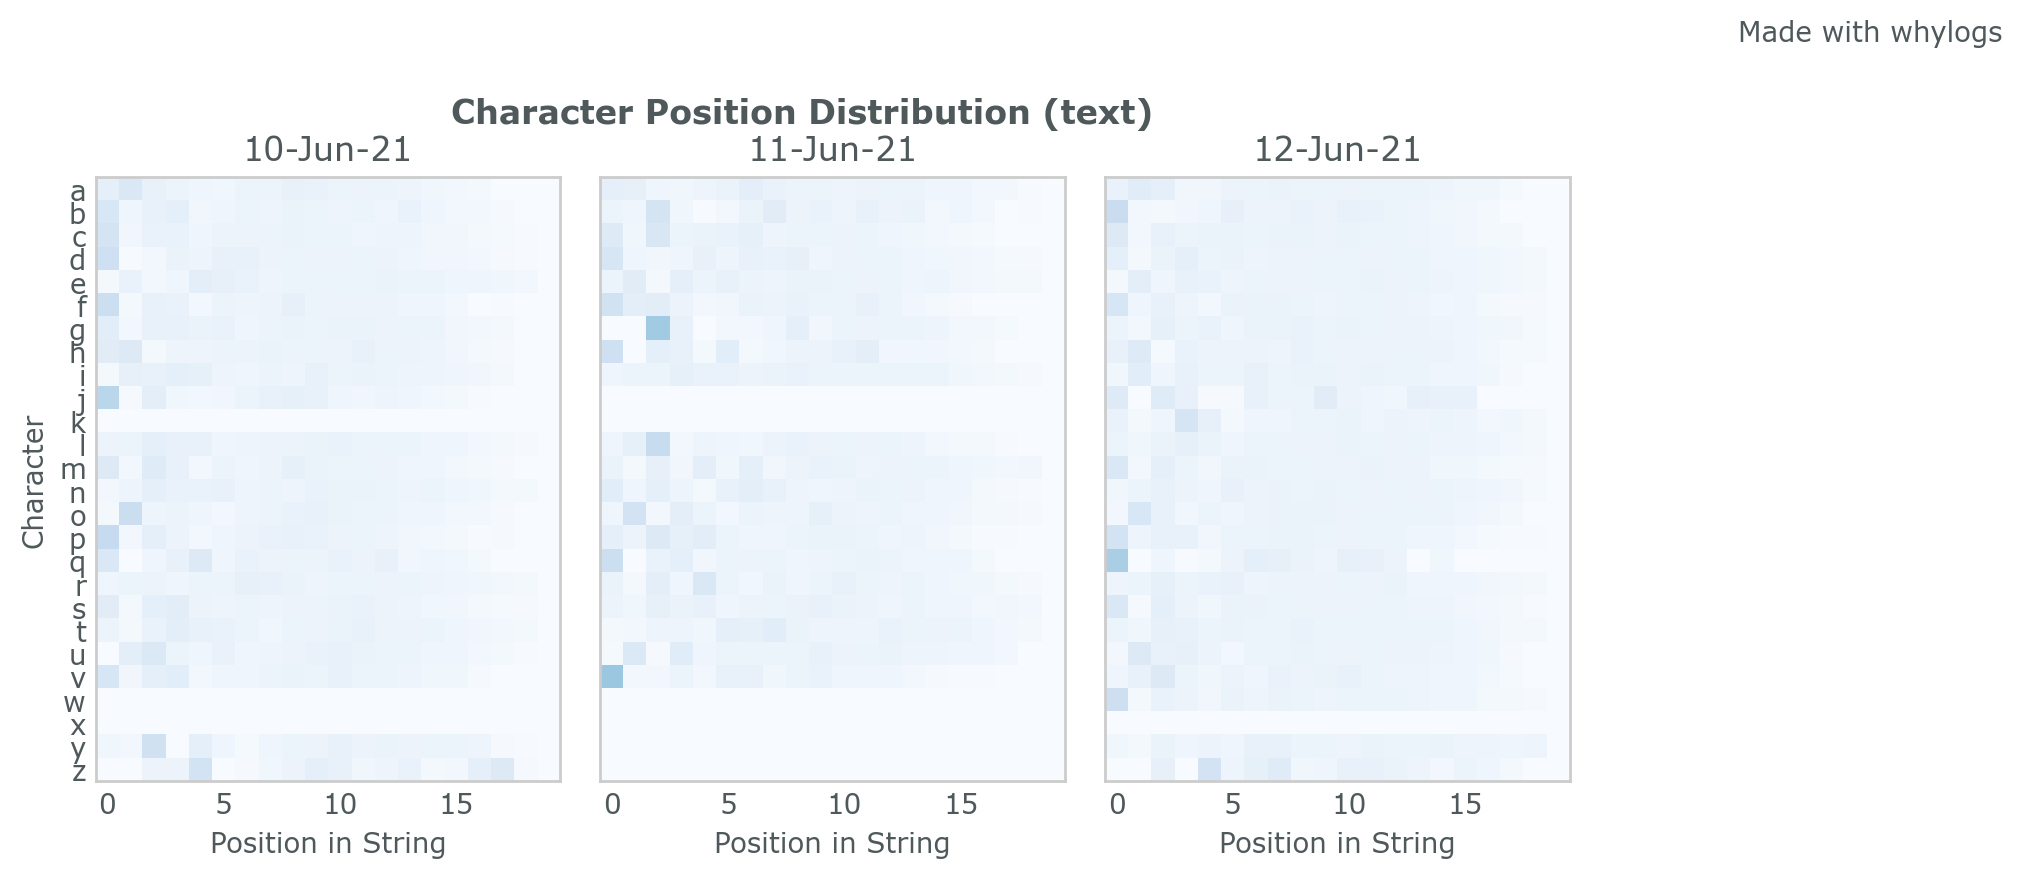

(<Figure size 2000x400 with 1 Axes>, <Figure size 2000x400 with 1 Axes>)

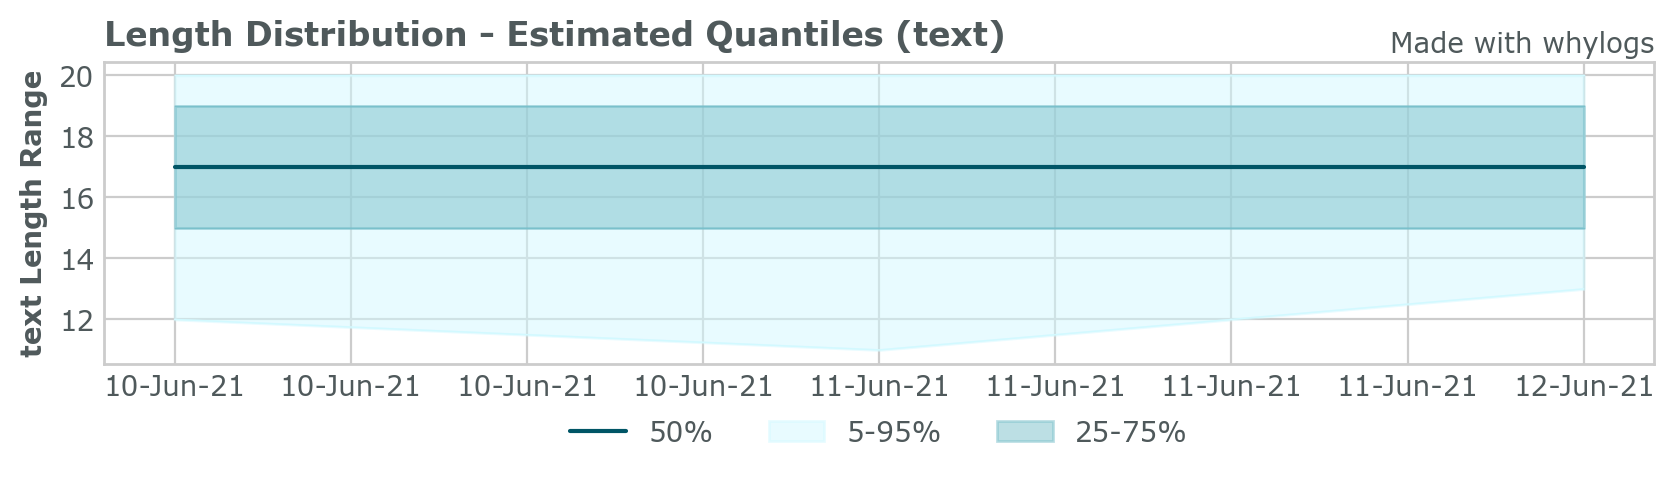

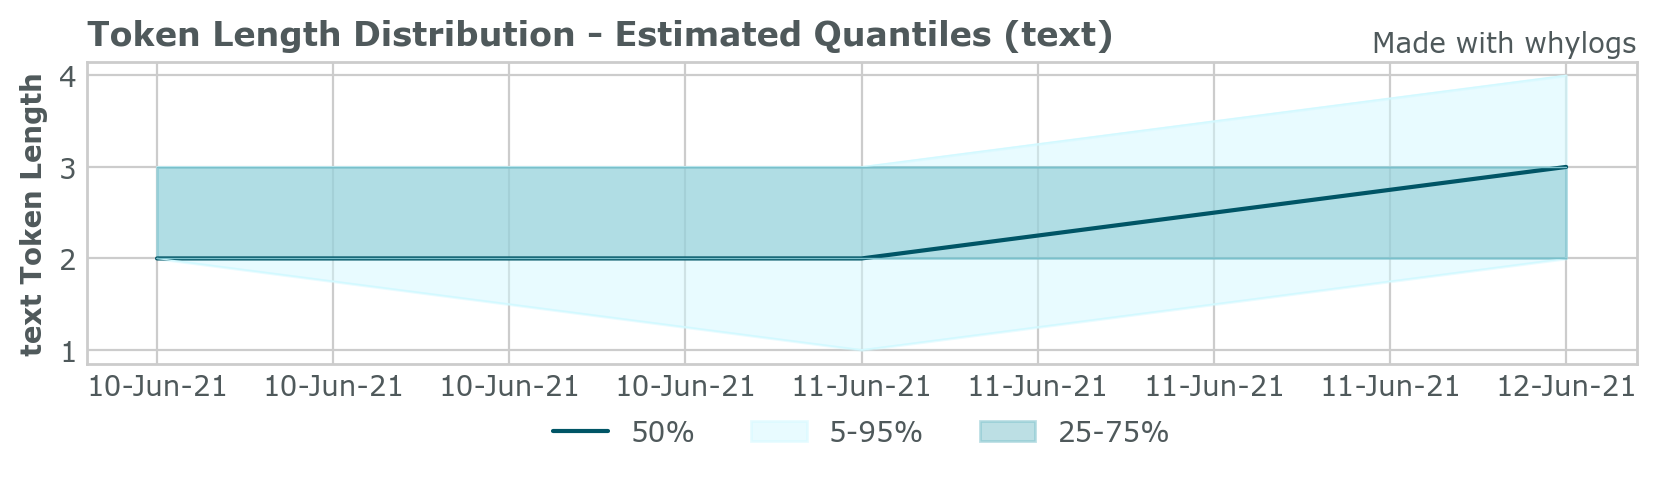

In [453]:
plot_char_pos_map([profile_text_1,profile_text_2,profile_text_3],"text",char_list=[char for char in "abcdefghijklmnopqrstuvwxyz"])
# plot_char_pos_map(profile_text_2,"text")
plot_string([profile_text_1,profile_text_2,profile_text_3],"text")
~

In [435]:
random_sentence("ru-RU").lower()

'посвятить нажать.'

In [415]:
from whylogs.viz.matplotlib.visualizer import MatplotlibProfileVisualizer

def plot_string(profiles,feature_name,ts_format="%d-%b-%y"):
    import matplotlib.dates as _dates
    import matplotlib.ticker as _ticker
    theme = {
            "colors": ["#005566", "#2683C9", "#44C0E7", "#F07028", "#FFDE1E"],
            "fill_colors": ["#D2F9FF", "#7AC0CB"],
            "font_color": "#4F595B",
        }
    chart_data= [ { "date": prof.dataset_timestamp, "profile": prof, 
                   "length_quantile_0.05": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.05])[0],
                  "length_quantile_0.25": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.25])[0],
                  "length_quantile_0.5": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.5])[0],
                  "length_quantile_0.75": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.75])[0],
                  "length_quantile_0.95": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.95])[0]} for prof in profiles ]
    chart_data= pd.DataFrame.from_records(chart_data)
    fig, ax = MatplotlibProfileVisualizer._chart_theming()
    ax.plot(
            chart_data.loc[:, "date"],
            chart_data.loc[:, "length_quantile_0.5"],
            color=theme["colors"][0],
            linewidth=1.5,
            label="50%",
        )

        # Lines bordering the fill area
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "length_quantile_0.05"],
        color=theme["fill_colors"][0],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "length_quantile_0.95"],
        color=theme["fill_colors"][0],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "length_quantile_0.25"],
        color=theme["fill_colors"][1],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "length_quantile_0.75"],
        color=theme["fill_colors"][1],
        linewidth=0.5,
    )

    # Fill areas
    ax.fill_between(
        pd.to_datetime(chart_data.loc[:, "date"]),
        y1=chart_data.loc[:, "length_quantile_0.05"],
        y2=chart_data.loc[:, "length_quantile_0.95"],
        alpha=0.5,
        color=theme["fill_colors"][0],
        label="5-95%",
    )
    ax.fill_between(
        pd.to_datetime(chart_data.loc[:, "date"]),
        y1=chart_data.loc[:, "length_quantile_0.25"],
        y2=chart_data.loc[:, "length_quantile_0.75"],
        alpha=0.5,
        color=theme["fill_colors"][1],
        label="25-75%",
    )

    ax.yaxis.set_label_text(feature_name + " Length Range", fontweight="bold")
    ax.set_title(
        f"Length Distribution - Estimated Quantiles ({feature_name})",
        loc="left",
        fontweight="bold",
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        frameon=False,
        ncol=3,
    )
    ax.xaxis.set_major_formatter(_dates.DateFormatter(ts_format))
    ax.yaxis.set_major_formatter(_ticker.ScalarFormatter(useOffset=False, useMathText=False, useLocale=None))

    return fig

In [451]:
def plot_string_length(chart_data, feature_name, ts_format):
    import matplotlib.dates as _dates
    import matplotlib.ticker as _ticker
    theme = {
            "colors": ["#005566", "#2683C9", "#44C0E7", "#F07028", "#FFDE1E"],
            "fill_colors": ["#D2F9FF", "#7AC0CB"],
            "font_color": "#4F595B",
        }
    chart_data= pd.DataFrame.from_records(chart_data)
    fig, ax = MatplotlibProfileVisualizer._chart_theming()
    ax.plot(
            chart_data.loc[:, "date"],
            chart_data.loc[:, "length_quantile_0.5"],
            color=theme["colors"][0],
            linewidth=1.5,
            label="50%",
        )

        # Lines bordering the fill area
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "length_quantile_0.05"],
        color=theme["fill_colors"][0],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "length_quantile_0.95"],
        color=theme["fill_colors"][0],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "length_quantile_0.25"],
        color=theme["fill_colors"][1],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "length_quantile_0.75"],
        color=theme["fill_colors"][1],
        linewidth=0.5,
    )

    # Fill areas
    ax.fill_between(
        pd.to_datetime(chart_data.loc[:, "date"]),
        y1=chart_data.loc[:, "length_quantile_0.05"],
        y2=chart_data.loc[:, "length_quantile_0.95"],
        alpha=0.5,
        color=theme["fill_colors"][0],
        label="5-95%",
    )
    ax.fill_between(
        pd.to_datetime(chart_data.loc[:, "date"]),
        y1=chart_data.loc[:, "length_quantile_0.25"],
        y2=chart_data.loc[:, "length_quantile_0.75"],
        alpha=0.5,
        color=theme["fill_colors"][1],
        label="25-75%",
    )

    ax.yaxis.set_label_text(feature_name + " Length Range", fontweight="bold")
    ax.set_title(
        f"Length Distribution - Estimated Quantiles ({feature_name})",
        loc="left",
        fontweight="bold",
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        frameon=False,
        ncol=3,
    )
    ax.xaxis.set_major_formatter(_dates.DateFormatter(ts_format))
    ax.yaxis.set_major_formatter(_ticker.ScalarFormatter(useOffset=False, useMathText=False, useLocale=None))
    return fig


def plot_string_token_length(chart_data, feature_name, ts_format):
    import matplotlib.dates as _dates
    import matplotlib.ticker as _ticker
    theme = {
            "colors": ["#005566", "#2683C9", "#44C0E7", "#F07028", "#FFDE1E"],
            "fill_colors": ["#D2F9FF", "#7AC0CB"],
            "font_color": "#4F595B",
        }
    chart_data= pd.DataFrame.from_records(chart_data)
    fig, ax = MatplotlibProfileVisualizer._chart_theming()
    ax.plot(
            chart_data.loc[:, "date"],
            chart_data.loc[:, "token_quantile_0.5"],
            color=theme["colors"][0],
            linewidth=1.5,
            label="50%",
        )

        # Lines bordering the fill area
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "token_quantile_0.05"],
        color=theme["fill_colors"][0],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "token_quantile_0.95"],
        color=theme["fill_colors"][0],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "token_quantile_0.25"],
        color=theme["fill_colors"][1],
        linewidth=0.5,
    )
    ax.plot(
        chart_data.loc[:, "date"],
        chart_data.loc[:, "token_quantile_0.75"],
        color=theme["fill_colors"][1],
        linewidth=0.5,
    )

    # Fill areas
    ax.fill_between(
        pd.to_datetime(chart_data.loc[:, "date"]),
        y1=chart_data.loc[:, "token_quantile_0.05"],
        y2=chart_data.loc[:, "token_quantile_0.95"],
        alpha=0.5,
        color=theme["fill_colors"][0],
        label="5-95%",
    )
    ax.fill_between(
        pd.to_datetime(chart_data.loc[:, "date"]),
        y1=chart_data.loc[:, "token_quantile_0.25"],
        y2=chart_data.loc[:, "token_quantile_0.75"],
        alpha=0.5,
        color=theme["fill_colors"][1],
        label="25-75%",
    )

    ax.yaxis.set_label_text(feature_name + " Token Length", fontweight="bold")
    ax.set_title(
        f"Token Length Distribution - Estimated Quantiles ({feature_name})",
        loc="left",
        fontweight="bold",
    )
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        frameon=False,
        ncol=3,
    )
    ax.xaxis.set_major_formatter(_dates.DateFormatter(ts_format))
    ax.yaxis.set_major_formatter(_ticker.ScalarFormatter(useOffset=False, useMathText=False, useLocale=None))
    return fig


def plot_string(profiles,feature_name,ts_format="%d-%b-%y"):
    import matplotlib.dates as _dates
    import matplotlib.ticker as _ticker
    theme = {
            "colors": ["#005566", "#2683C9", "#44C0E7", "#F07028", "#FFDE1E"],
            "fill_colors": ["#D2F9FF", "#7AC0CB"],
            "font_color": "#4F595B",
        }
    chart_data= [ { "date": prof.dataset_timestamp, "profile": prof, 
                  "length_quantile_0.05": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.05])[0],
                  "length_quantile_0.25": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.25])[0],
                  "length_quantile_0.5": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.5])[0],
                  "length_quantile_0.75": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.75])[0],
                  "length_quantile_0.95": prof.columns[feature_name].string_tracker.length.histogram.get_quantiles([0.95])[0],
                  "token_quantile_0.05": prof.columns[feature_name].string_tracker.token_length.histogram.get_quantiles([0.05])[0],
                  "token_quantile_0.25": prof.columns[feature_name].string_tracker.token_length.histogram.get_quantiles([0.25])[0],
                  "token_quantile_0.5": prof.columns[feature_name].string_tracker.token_length.histogram.get_quantiles([0.5])[0],
                  "token_quantile_0.75": prof.columns[feature_name].string_tracker.token_length.histogram.get_quantiles([0.75])[0],
                  "token_quantile_0.95": prof.columns[feature_name].string_tracker.token_length.histogram.get_quantiles([0.95])[0]} for prof in profiles ]
    chart_data= pd.DataFrame.from_records(chart_data)
    fig1=plot_string_length(chart_data, feature_name,ts_format)
    fig2=plot_string_token_length(chart_data, feature_name,ts_format)

    return fig1, fig2

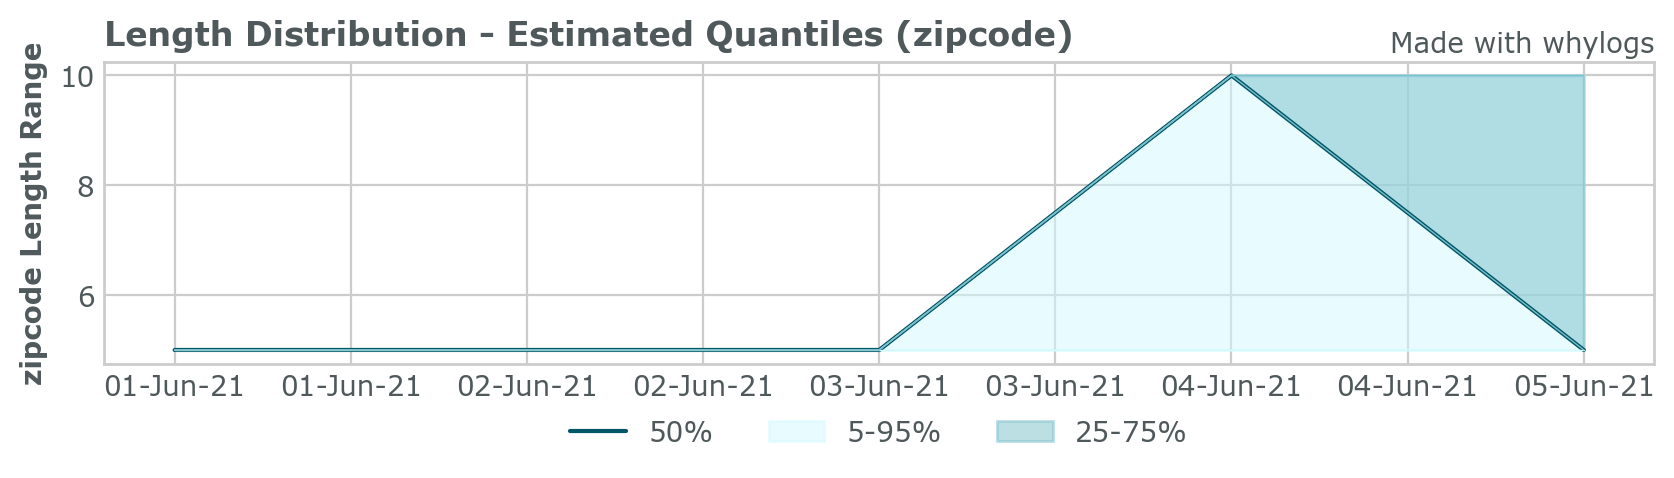

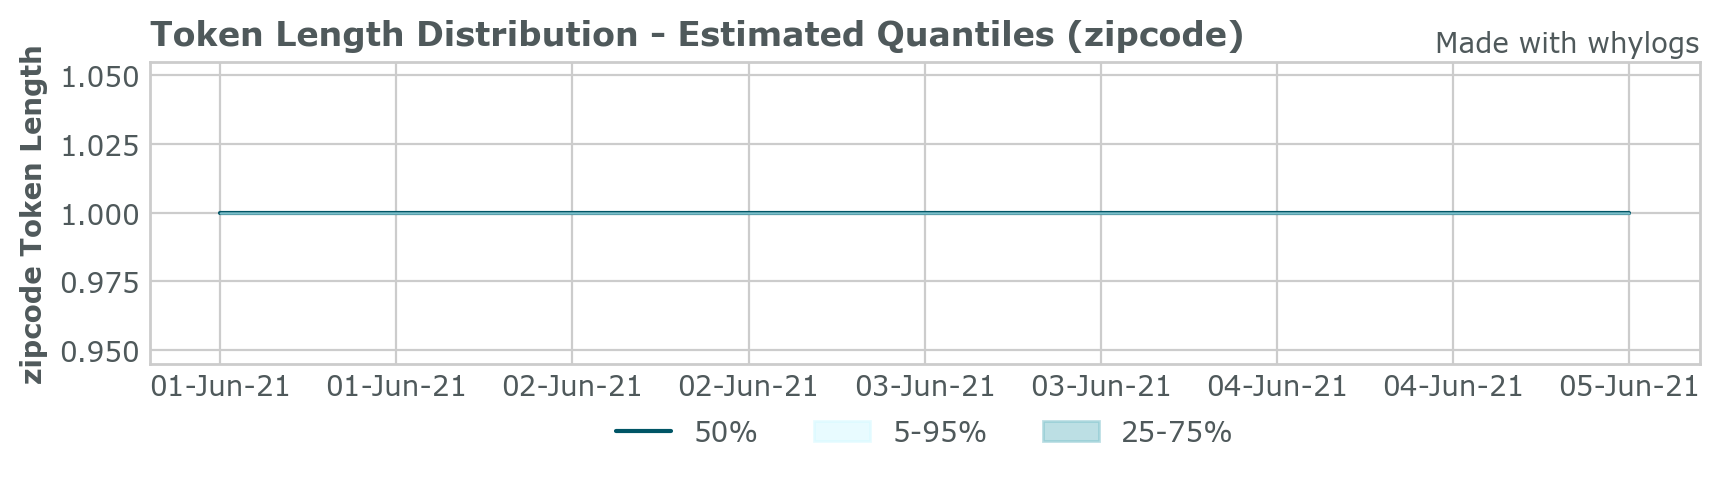

In [452]:
fig= plot_string(profiles,"zipcode")

In [76]:
import json
print(profile_1.flat_summary()["summary"].columns)
print(profile_1.flat_summary()["summary"])

Index(['column', 'bool_count', 'count', 'dtype_fraction', 'inferred_dtype',
       'max', 'max_length', 'max_token_length', 'mean', 'mean_length',
       'mean_token_length', 'min', 'min_length', 'min_token_length',
       'null_count', 'numeric_count', 'nunique_numbers',
       'nunique_numbers_lower', 'nunique_numbers_upper', 'nunique_str',
       'nunique_str_lower', 'nunique_str_upper', 'quantile_0.0000',
       'quantile_0.0100', 'quantile_0.0500', 'quantile_0.2500',
       'quantile_0.5000', 'quantile_0.7500', 'quantile_0.9500',
       'quantile_0.9900', 'quantile_1.0000', 'stddev', 'stddev_length',
       'stddev_token_length', 'type_boolean_count', 'type_fractional_count',
       'type_integral_count', 'type_null_count', 'type_string_count',
       'type_unknown_count'],
      dtype='object')
    column  bool_count   count  dtype_fraction  inferred_dtype      max  \
0  zipcode         0.0  1000.0             1.0             3.0  99402.0   

   max_length  max_token_length      

In [375]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid



plt.show()
def plot_char_pos_map(profiles, feature_name, char_list=None, ts_format="%d-%b-%y"):
    dates= [ prof.dataset_timestamp for prof in profiles ]
    max_length= max( [ prof.columns[feature_name].string_tracker.length.histogram.get_max_value() for prof in profiles])
    
    matrixes=[]
    set_char_list=set()
    if char_list is None:
        
        char_list=['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    bins = list(range(1, int(max_length+1)))
    for prof in profiles:
        mycounts = prof.columns[feature_name].string_tracker.char_pos_tracker.char_pos_map


#         max_length=length.histogram.get_max_value()

        
        max_length= max([val.histogram.get_max_value() for key, val in mycounts.items() ])
        keycount={ key: np.array(
                val.histogram.get_pmf(bins[:-1])) for key, val in mycounts.items()}

        char_list, matrx =array_creation(keycount,bins,char_list)
        set_char_list=set.union(set_char_list,set(char_list))
        matrixes.append(matrx)
    set_char_list=list(set_char_list)
    set_char_list.sort()
    
    fig = plt.figure(figsize=(12., 4.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, len(profiles)),  # creates 2x2 grid of axes
                 axes_pad=0.2,  # pad between axes in inch.
                 )
    fig.text(
            1.0,
            1.06,
            "Made with whylogs",
            horizontalalignment="right",
            verticalalignment="center",
            fontsize=10,
        )
    for idx, (ax, mat)  in enumerate(zip(grid, matrixes)):
    # Iterating over the grid returns the Axes.
        ax.imshow(mat,  cmap='Blues',
               vmin=0, vmax=1, aspect='auto')
        
   
        ax.set_xlabel("Position in String")
        ax.set_ylabel("Character")
        ax.set_xticks(range(len(bins)),bins)
        ax.set_yticks(range(len(char_list)))
        ax.set_yticklabels(char_list)
#         ax.set_ytickslabels(,char_list)
#         fig.colorbar(ax=ax)
        ax.grid(False)
        ax.set_title(f"{dates[idx].strftime(ts_format)}")
    fig.suptitle(f"Character Position Distribution ({feature_name})",fontweight="bold")
    
    plt.show()

In [ ]:
base = datetime.datetime(2021, 6, 6)
arr = numpy.array([base + datetime.timedelta(hours=i) for i in xrange(24)])

In [464]:
"derhetr👍".encode("ascii")

    
values=["derhetr👍","derhetrtf\n"]
for each_val in values:
    for indx, char in enumerate(each_val.lower()):
        try:
            print(char.encode("ascii"))
        except Exception as e:
            print(f"couldnt encode in ascii::{e}")

UnicodeEncodeError: 'ascii' codec can't encode character '\U0001f44d' in position 7: ordinal not in range(128)

## New Charts

In [471]:
from whylogs.viz import ProfileVisualizer

profiles= [profile_1,profile_2,profile_3,profile_4,profile_5]
viz = ProfileVisualizer()
viz.set_profiles(profiles)
viz.plot_string("zipcode")

AttributeError: 'ProfileVisualizer' object has no attribute 'plot_string'